In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("../dropped_unnecessary.csv")
print(df.head())

C:\Users\furka\Miniconda3\envs\fifa\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,5,10,13,19,20,21,22,23,24,25,26,27,28,29,30,31,49,51,57,58,59,60,61,62,63,64,65,66,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         date   dif  draw_count  goals_against  goals_scored  \
0  2006-11-03 -20.0         6.0           54.0          34.0   
1  2010-08-27   4.0         0.0            1.0           5.0   
2  2010-09-17   3.0         1.0            5.0           8.0   
3  2010-09-24  -3.0         1.0           11.0           8.0   
4  2010-10-15  -7.0         1.0           16.0           9.0   

               league  lose_count  points  ranking  season  ...  \
0  Germany Bundesliga        13.0    24.0     16.0    2005  ...   
1  Germany Bundesliga         0.0     6.0      1.0    2010  ...   
2  Germany Bundesliga         1.0     7.0      6.0    2010  ...   
3  Germany Bundesliga         3.0     7.0     11.0    2010  ...   
4  Germany Bundesliga         5.0     7.0     14.0    2010  ...   

  Team Width_away  Defender Line_away  DP_away IP_away  SAA_away  TAA_away  \
0          Narrow               Cover     18.0    13.0      23.0     25.82   
1          Normal               Cover      9.0     8.0  

In [86]:
print(df.columns)

Index(['date', 'dif', 'draw_count', 'goals_against', 'goals_scored', 'league',
       'lose_count', 'points', 'ranking', 'season', 'team', 'week',
       'win_count', 'Team Name', 'ID', 'OVA', 'ATT', 'MID', 'DEF',
       'Transfer Budget', 'Speed', 'Dribbling', 'BuildPassing',
       'BuildPositioning', 'Crossing', 'ChancePassing', 'Shooting',
       'ChancePositioning', 'Aggression', 'Pressure', 'Team Width',
       'Defender Line', 'DP', 'IP', 'SAA', 'TAA', 'away_score_final',
       'away_score_first', 'away_team', 'home_score_final', 'home_score_first',
       'home_team', 'dif_away', 'draw_count_away', 'goals_against_away',
       'goals_scored_away', 'lose_count_away', 'points_away', 'ranking_away',
       'team_away', 'win_count_away', 'Team Name_away', 'ID_away', 'OVA_away',
       'ATT_away', 'MID_away', 'DEF_away', 'Transfer Budget_away',
       'Speed_away', 'Dribbling_away', 'BuildPassing_away',
       'BuildPositioning_away', 'Crossing_away', 'ChancePassing_away',
       '

In [87]:
df.drop(columns=["date", "league", "season", "week", "win", "draw", "lose", "ID", "ID_away",
                 "Team Name", "Team Name_away", "away_team", "home_team", "team", "team_away",
                "away_score_final", "away_score_first", "home_score_final", "home_score_first"], inplace=True)

In [88]:
import re
df["Transfer Budget"] = (df["Transfer Budget"].replace(r'[KM]+$', '', regex=True).astype(float) * \
                          df["Transfer Budget"].str.extract(r'[\d\.]+([KM]+)', expand=False)
                          .fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df["Transfer Budget_away"] = (df["Transfer Budget_away"].replace(r'[KM]+$', '', regex=True).astype(float) * \
                          df["Transfer Budget_away"].str.extract(r'[\d\.]+([KM]+)', expand=False)
                          .fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [89]:
df = df.dropna()

In [90]:
X = df.drop("outcome_of_match", axis = 1)
y = df["outcome_of_match"].values

In [91]:
X.columns

Index(['dif', 'draw_count', 'goals_against', 'goals_scored', 'lose_count',
       'points', 'ranking', 'win_count', 'OVA', 'ATT', 'MID', 'DEF',
       'Transfer Budget', 'Speed', 'Dribbling', 'BuildPassing',
       'BuildPositioning', 'Crossing', 'ChancePassing', 'Shooting',
       'ChancePositioning', 'Aggression', 'Pressure', 'Team Width',
       'Defender Line', 'DP', 'IP', 'SAA', 'TAA', 'dif_away',
       'draw_count_away', 'goals_against_away', 'goals_scored_away',
       'lose_count_away', 'points_away', 'ranking_away', 'win_count_away',
       'OVA_away', 'ATT_away', 'MID_away', 'DEF_away', 'Transfer Budget_away',
       'Speed_away', 'Dribbling_away', 'BuildPassing_away',
       'BuildPositioning_away', 'Crossing_away', 'ChancePassing_away',
       'Shooting_away', 'ChancePositioning_away', 'Aggression_away',
       'Pressure_away', 'Team Width_away', 'Defender Line_away', 'DP_away',
       'IP_away', 'SAA_away', 'TAA_away'],
      dtype='object')

In [92]:
def one_hot_dataframe(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = df.drop(each, axis = 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [93]:
encoded_X = one_hot_dataframe(X, ["Speed",
                                "Dribbling",
                                "BuildPassing",
                                "BuildPositioning",
                                "Crossing",
                                "ChancePassing",
                                "Shooting",
                                "ChancePositioning",
                                "Aggression",
                                "Pressure",
                                "Team Width",
                                "Defender Line",
                                "Speed_away",
                                "Dribbling_away",
                                "BuildPassing_away",
                                "BuildPositioning_away",
                                "Crossing_away",
                                "ChancePassing_away",
                                "Shooting_away",
                                "ChancePositioning_away",
                                "Aggression_away",
                                "Pressure_away",
                                "Team Width_away",
                                "Defender Line_away"])

In [94]:
label_encoder = OneHotEncoder(categories = "auto", sparse=False)
y = label_encoder.fit_transform(y.reshape(-1, 1))

In [95]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(encoded_X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = .2)

In [97]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train.astype(int))

C:\Users\furka\Miniconda3\envs\fifa\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3013720742534302


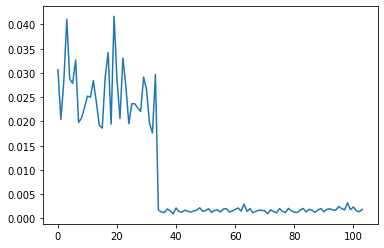

In [99]:
plt.plot(classifier.feature_importances_)

In [100]:
classifier.feature_importances_
X.columns[:34]

Index(['dif', 'draw_count', 'goals_against', 'goals_scored', 'lose_count',
       'points', 'ranking', 'win_count', 'OVA', 'ATT', 'MID', 'DEF',
       'Transfer Budget', 'Speed', 'Dribbling', 'BuildPassing',
       'BuildPositioning', 'Crossing', 'ChancePassing', 'Shooting',
       'ChancePositioning', 'Aggression', 'Pressure', 'Team Width',
       'Defender Line', 'DP', 'IP', 'SAA', 'TAA', 'dif_away',
       'draw_count_away', 'goals_against_away', 'goals_scored_away',
       'lose_count_away'],
      dtype='object')

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer



clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))



# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 

# format before training.

mlb = MultiLabelBinarizer()

y = mlb.fit_transform(y_train)



clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=4, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=-1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [102]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.33494753833736884
